In [ ]:
import os
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 08 May 22/live demo"
os.chdir(ROOT)
assert ROOT == os.getcwd()

## A simple classifier using Keras's Sequential API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [ ]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


### Observe the training when we do no scale. 

In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
# X_valid, X_train = X_train_full[:5000], X_train_full[5000:]

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.
# X_test = X_test




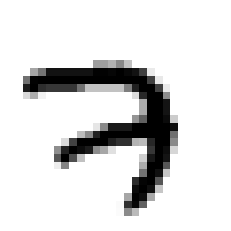

In [ ]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


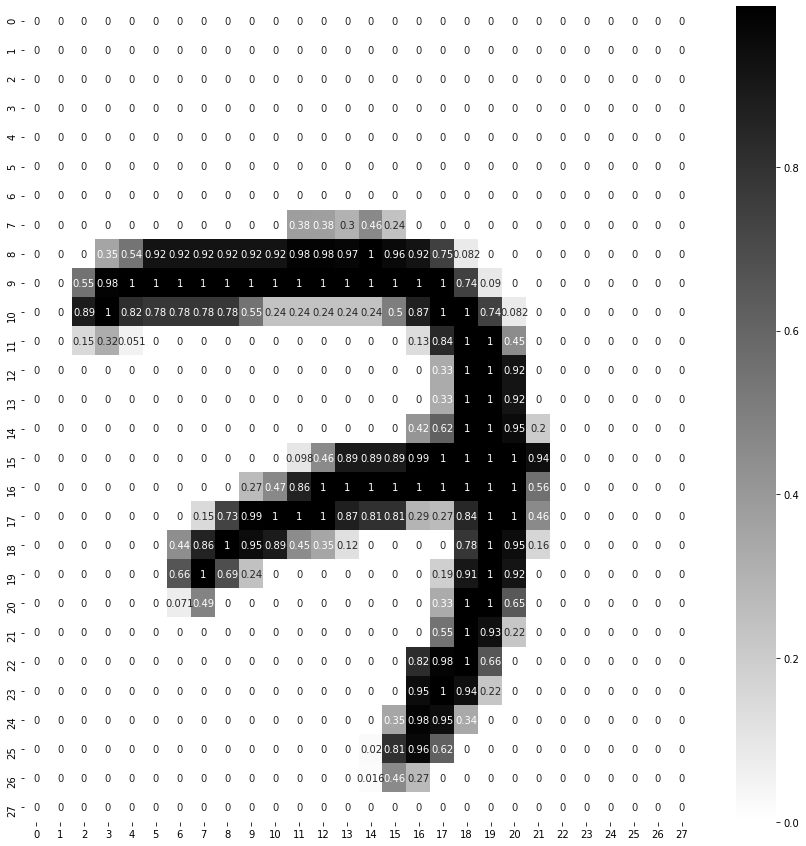

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
# actual value of y_train
y_train[0]

7

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [ ]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [ ]:
type(hidden1.get_weights())

list

In [ ]:
hidden1.get_weights()

[array([[ 0.02391411, -0.00458571,  0.03504915, ..., -0.06125718,
          0.05891162, -0.06014404],
        [-0.02630292,  0.02543592,  0.030443  , ..., -0.03878435,
         -0.04283032,  0.04210998],
        [-0.02921217, -0.01283023, -0.0008138 , ...,  0.06389566,
          0.0321565 , -0.01396762],
        ...,
        [-0.06061342,  0.01524021,  0.02088983, ...,  0.01153516,
          0.03130943,  0.04560159],
        [-0.02818784,  0.0038124 ,  0.02895694, ..., -0.00878916,
         -0.0338216 , -0.00887739],
        [ 0.05030017, -0.00991423,  0.05178612, ..., -0.05031374,
          0.00391978,  0.06082377]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[ 0.02391411, -0.00458571,  0.03504915, ..., -0.06125718,
         0.05891162, -0.06014404],
       [-0.02630292,  0.02543592,  0.030443  , ..., -0.03878435,
        -0.04283032,  0.04210998],
       [-0.02921217, -0.01283023, -0.0008138 , ...,  0.06389566,
         0.0321565 , -0.01396762],
       ...,
       [-0.06061342,  0.01524021,  0.02088983, ...,  0.01153516,
         0.03130943,  0.04560159],
       [-0.02818784,  0.0038124 ,  0.02895694, ..., -0.00878916,
        -0.0338216 , -0.00887739],
       [ 0.05030017, -0.00991423,  0.05178612, ..., -0.05031374,
         0.00391978,  0.06082377]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [ ]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

### Unscaled and epochs increased


In [ ]:
55000/16

3437.5

# Tensorboard callback

In [ ]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, fileName)
  print(f"saving logs at: {log_path}")
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at: logs/fit/log_2021_05_22_09_11_30


# Early stopping callbacks

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model Checkpointing callback

In [ ]:
CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [ ]:
# EPOCHS = 30
EPOCHS = 50

# EPOCHS = 200

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9660 - val_loss: 0.1213 - val_accuracy: 0.9670
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9684 - val_loss: 0.1155 - val_accuracy: 0.9680
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9712 - val_loss: 0.1096 - val_accuracy: 0.9698
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0955 - accuracy: 0.9734 - val_loss: 0.1014 - val_accuracy: 0.9716
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0885 - accuracy: 0.9759 - val_loss: 0.0974 - val_accuracy: 0.9732
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0824 - accuracy: 0.9774 - val_loss: 0.0935 - val_accuracy: 0.9736
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9783 - val_loss: 0.0902 - val_accuracy:

In [ ]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                              checkpointing_cb])


Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9645 - val_loss: 0.1226 - val_accuracy: 0.9654
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1160 - accuracy: 0.9677 - val_loss: 0.1191 - val_accuracy: 0.9678
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1067 - accuracy: 0.9701 - val_loss: 0.1075 - val_accuracy: 0.9702
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0984 - accuracy: 0.9731 - val_loss: 0.1047 - val_accuracy: 0.9704
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0909 - accuracy: 0.9750 - val_loss: 0.0997 - val_accuracy: 0.9734
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9765 - val_loss: 0.0968 - val_accuracy: 0.9718
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0787 - accuracy: 0.9784 - val_loss: 0.0912 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
import time 
import os

def savedModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"model {fileName} will be saved at {model_path}")
  return model_path 

In [ ]:
# os.path.join("dir", "filename")

In [ ]:
UNIQUE_PATH = savedModel_path()
UNIQUE_PATH

In [ ]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [ ]:
history.params

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()


In [ ]:
model_clf.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

In [ ]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

In [ ]:
y_test_new = y_test[:3]
y_test_new

In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("###########")



In [ ]:
# a = [1,2,3]
# b = [6,3,2]
# c = [6,3,2]

# for x,y,z in zip(a,b,c):
#   print(x,y,z)

In [ ]:
loaded_model = tf.keras.models.load_model("TRAINED_MODEL/Model_2021_05_22_07_41_36_.h5")

In [ ]:
loaded_model.evaluate(X_test, y_test) # 313 = 10000/32

In [ ]:
loaded_model.predict_classes(X_new)

In [ ]:
10000/32

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
%ls